### Predicting Homes Sales Price - Regression 

In this notebook, we're going to go through a machine learning project with the goal of predicting the sale price of homes. The intent is to decrease the current best root mean squared log error generated from other models by competitors of Kaggle Predict Price Competiton. 


### I. Problem Definition

How can we predict the future sale price of homes, given its characteristics and previous examples of how much similar homes have been sold for?

### II. Data

The data is downloaded from the Kaggle Predict Home Prices competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

There are 2 main datasets:<br>
```Train.csv``` is the training set <br>
```test.csv``` is the test set

### Evaluation

The models are evaluated on Root-Mean-Squared-Error (RMSLE) between the logarithm of the predicted value and the logarithm of the observed sales price.

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

### Data Features

Kaggle (author of the dataset) has provided data dictionary detailing all of the features of the dataset. To view click <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data">here</a>. 

#### Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.ensemble import RandomForestRegressor

#### Importing Data

In [79]:
train = pd.read_csv("train.csv", parse_dates=['YrSold'])
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008-01-01,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007-01-01,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008-01-01,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006-01-01,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008-01-01,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007-01-01,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010-01-01,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010-01-01,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010-01-01,WD,Normal,142125


In [179]:
test= pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Exploring training set

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   Alley          91 non-null     object        
 7   LotShape       1460 non-null   object        
 8   LandContour    1460 non-null   object        
 9   Utilities      1460 non-null   object        
 10  LotConfig      1460 non-null   object        
 11  LandSlope      1460 non-null   object        
 12  Neighborhood   1460 non-null   object        
 13  Condition1     1460 non-null   object        
 14  Condition2     1460 non-null   object        
 15  BldgType       1460 n

We can see there are some NA values.

Let's make it easier to read the features of the dataset.

In [88]:
train.head().T

,781,134,668,669,1346
Id,782,135,669,670,1347
MSSubClass,60,20,20,30,20
MSZoning,4,4,4,4,4
LotFrontage,65.0,78.0,69.0,80.0,69.0
LotArea,7153,10335,14175,11600,20781
...,...,...,...,...,...
Fence_is_missing,True,False,True,True,True
MiscFeature_is_missing,True,True,True,True,True
YrSold_is_missing,False,False,False,False,False
SaleType_is_missing,False,False,False,False,False


#### Finding Null Values

In [14]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Total missing values

In [16]:
sum(train.isna().sum())

6965

We can see the dataset contains a lot of non-integer values. In addition, we have to turn categorical data into numbers. 

### Imputing Data

In [80]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
        
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    

In [82]:
preprocess_data(train)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,YrSold_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1456,1457,20,4,85.0,13175,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
1457,1458,70,4,66.0,9042,2,0,4,4,1,...,False,False,False,False,True,False,False,False,False,False
1458,1459,20,4,68.0,9717,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False


In [84]:
train.sort_values(by=['YrSold'], inplace=True, ascending=True)

### Visualising Patterns - Overall Condition vs SalePrice

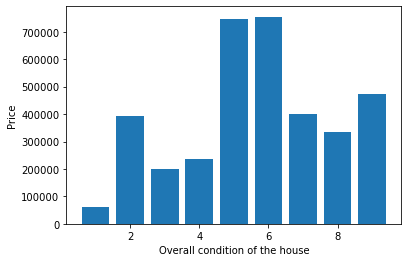

In [92]:
#Helper for visual charts
def plotit(x,y, x1, y1):
    fig, ax = plt.subplots()
    ax.bar(x , y)
    plt.xlabel(x1)
    plt.ylabel(y1)
    
plotit(train['OverallCond'], train['SalePrice'], "Overall condition of the house", "Price")    

Let's investigate other patterns

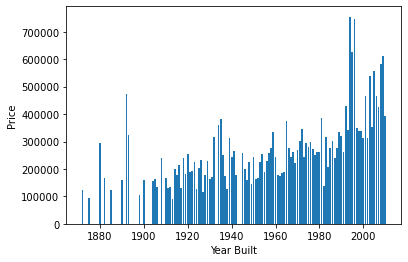

In [94]:
plotit(train['YearBuilt'], train['SalePrice'], "Year Built", "Price")    

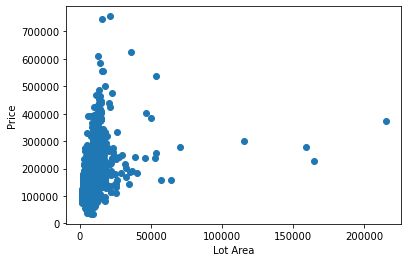

In [96]:
#Helper for scatterplot

def plotit_scatter(x,y,x1,y1):
    fig, ax = plt.subplots()
    ax.scatter(x , y)
    plt.xlabel(x1)
    plt.ylabel(y1)
    
plotit_scatter(train['LotArea'], train['SalePrice'], "Lot Area", "Price")    

In [106]:
train_tmp = train.copy()

In [107]:
targetprice_training = train_tmp.drop('SalePrice',axis=1)

### Initiating Model

In [108]:
rfr = RandomForestRegressor(n_jobs=-1, random_state=42)
rfr.fit(targetprice_training, train_tmp['SalePrice'])

RandomForestRegressor(n_jobs=-1, random_state=42)

Scoring the model

In [113]:
rfr.score(targetprice_training, train_tmp["SalePrice"])

0.9793311110292451

In [114]:
train_tmp.YrSold.value_counts()

4    338
2    329
1    314
3    304
5    175
Name: YrSold, dtype: int64

In [118]:
# Split data into training and validation
df_val = train_tmp[train_tmp.YrSold == 5]
df_train = train_tmp[train_tmp.YrSold != 5]

len(df_val), len(df_train)

(175, 1285)

In [119]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1285, 127), (1285,), (175, 127), (175,))

In [122]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [125]:
rfr_testing = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

In [126]:
rfr_testing.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [128]:
show_scores(rfr)

{'Training MAE': 6621.290614785993,
 'Valid MAE': 6123.609142857142,
 'Training RMSLE': 0.06128515821963069,
 'Valid RMSLE': 0.0497791563719422,
 'Training R^2': 0.978630125792485,
 'Valid R^2': 0.9843145004724293}

### Hyperparameter Tuning with RandomizedSearchCV

In [134]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],}

# Instantiate RandomizedSearchCV model
rfr_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rfr_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 525 ms, sys: 65.4 ms, total: 591 ms
Wall time: 807 ms


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [135]:
rfr_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10}

In [136]:
show_scores(rfr_model)

{'Training MAE': 15874.972222862221,
 'Valid MAE': 19869.950130990514,
 'Training RMSLE': 0.13306812220216105,
 'Valid RMSLE': 0.1672960065338794,
 'Training R^2': 0.8782959840449935,
 'Valid R^2': 0.8388619580869492}

In [139]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=10,
                                    min_samples_leaf=3,
                                    min_samples_split=16,
                                    max_features='sqrt',
                                    max_depth=10,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=16, n_estimators=10, random_state=42)

In [140]:
show_scores(ideal_model)

{'Training MAE': 15874.972222862221,
 'Valid MAE': 19869.950130990514,
 'Training RMSLE': 0.13306812220216105,
 'Valid RMSLE': 0.1672960065338794,
 'Training R^2': 0.8782959840449935,
 'Valid R^2': 0.8388619580869491}

We managed to gather a RSMLE of 0.13306812220216105 on our training set.

Based on the following model we can also find feature importances.

In [192]:
ideal_model.feature_importances_

array([4.18775998e-03, 3.03120773e-03, 1.56498455e-03, 1.01748369e-02,
       1.18069612e-02, 0.00000000e+00, 1.07013876e-04, 5.31361669e-04,
       2.09519578e-03, 0.00000000e+00, 1.25591310e-03, 7.79310438e-04,
       4.08640654e-03, 3.12440537e-04, 0.00000000e+00, 1.04546444e-03,
       3.30121986e-03, 1.48457872e-01, 9.86991870e-03, 4.45555321e-02,
       6.74581598e-03, 2.15092715e-04, 0.00000000e+00, 3.27640770e-03,
       7.69198836e-04, 4.84862848e-04, 8.66873951e-03, 6.96948232e-02,
       2.06087930e-04, 8.08591782e-03, 1.01454322e-01, 6.35319136e-04,
       4.01530979e-03, 2.12784851e-03, 1.82110553e-02, 6.05546983e-04,
       1.00281780e-03, 5.84177670e-03, 3.53387386e-02, 0.00000000e+00,
       2.74464905e-03, 6.71500501e-04, 3.64920526e-04, 5.29129561e-02,
       1.55644080e-02, 0.00000000e+00, 8.42203752e-02, 3.82677832e-03,
       3.12166915e-04, 3.65237116e-03, 2.41097060e-03, 1.05371781e-03,
       0.00000000e+00, 6.06872309e-02, 2.60631298e-02, 3.04241310e-04,
      

In [193]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()


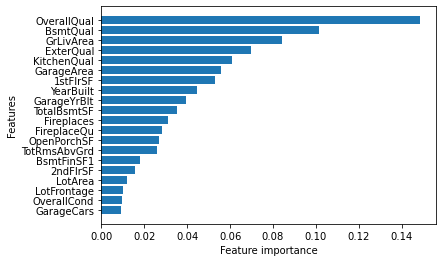

In [194]:
plot_features(X_train.columns, ideal_model.feature_importances_)

### Checking the performance of our model on test data

In [180]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [182]:
preprocess_data(test)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21.0,1936,2,0,4,4,1,...,False,False,True,True,False,True,True,True,False,False
1455,2916,160,5,21.0,1894,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1456,2917,20,4,160.0,20000,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1457,2918,85,4,62.0,10441,2,0,4,4,1,...,False,False,True,True,False,True,False,False,False,False


Missing column values

In [185]:
set(X_train.columns) - set(test.columns)

{'YrSold_is_missing'}

In [188]:
test['YrSold_is_missing'] = False
test['YrSold_is_missing']

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Name: YrSold_is_missing, Length: 1459, dtype: bool

In [225]:
new_test = pd.read_csv('testing.csv')
new_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,YrSold_is_missing
0,1461,20,3,80,11622,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
1,1462,20,4,81,14267,2,0,1,4,1,...,False,False,False,False,True,True,False,False,False,False
2,1463,60,4,74,13830,2,0,1,4,1,...,False,False,False,False,True,False,True,False,False,False
3,1464,60,4,78,9978,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
4,1465,120,4,43,5005,2,0,1,2,1,...,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21,1936,2,0,4,4,1,...,True,True,True,False,True,True,True,False,False,False
1455,2916,160,5,21,1894,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1456,2917,20,4,160,20000,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1457,2918,85,4,62,10441,2,0,4,4,1,...,True,True,True,False,True,False,False,False,False,False


In [227]:
set(X_train) - set (new_test)

set()

In [230]:
test_preds = ideal_model.predict(new_test)
test_preds

/Users/akshaykhandelwal/Desktop/BB/env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([126357.26874205, 155974.6120502 , 176624.32719695, ...,
       158698.53530797, 120439.80486442, 218610.63782801])

We've made some predictions but they're not in the same format Kaggle is asking for https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

In [231]:
df_testpreds = pd.DataFrame()
df_testpreds["Id"] = new_test["Id"]
df_testpreds["SalesPrice"] = test_preds
df_testpreds

,Id,SalesPrice
0,1461,126357.268742
1,1462,155974.612050
2,1463,176624.327197
3,1464,193146.546453
4,1465,209757.811240
...,...,...
1454,2915,92146.733935
1455,2916,103682.349318
1456,2917,158698.535308
1457,2918,120439.804864


In [232]:
# Export prediction data
df_testpreds.to_csv("test_predictions.csv", index=False)

## Conclusion

In [235]:
final_test_predictions = pd.read_csv('test_predictions.csv')
final_test_predictions

,Id,SalesPrice
0,1461,126357.268742
1,1462,155974.612050
2,1463,176624.327197
3,1464,193146.546453
4,1465,209757.811240
...,...,...
1454,2915,92146.733935
1455,2916,103682.349318
1456,2917,158698.535308
1457,2918,120439.804864


In [ ]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=10,
                                    min_samples_leaf=3,
                                    min_samples_split=16,
                                    max_features='sqrt',
                                    max_depth=10,
                                    random_state=42) 

# Fit the ideal model
ideal_model.fit(X_train, y_train)